In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, BaselineOnly
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
from sklearn.neighbors import NearestNeighbors 
from surprise import Dataset, Reader, SVD, BaselineOnly, accuracy, Prediction
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate

In [2]:
# reading csv 
movies = pd.read_csv('/Users/hannwenyein/Downloads/archive-3/movies_metadata.csv', dtype={10: 'str'})

# view first 5 rows
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
#Create a new dataset with only the specified columns
columns = ['genres', 'id', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count' ]

movies = movies[columns]

In [5]:
movies.dropna(inplace=True)

In [6]:
#checking null values
movies.isnull().sum()

genres          0
id              0
popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45376 non-null  object 
 1   id            45376 non-null  object 
 2   popularity    45376 non-null  object 
 3   release_date  45376 non-null  object 
 4   title         45376 non-null  object 
 5   vote_average  45376 non-null  float64
 6   vote_count    45376 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.8+ MB


In [8]:
movies.rename(columns={'id': 'movieId'}, inplace=True)

In [9]:
# reading csv 
ratings = pd.read_csv('/Users/hannwenyein/Downloads/archive-3/ratings.csv', dtype={10: 'str'})

# view first 5 rows
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [11]:
#checking null values
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
movies['movieId'] = movies['movieId'].astype('int64')

In [13]:
merged_df = pd.merge(ratings, movies, left_on='movieId', right_on='movieId', how='left')


In [14]:
merged_df.head(3)

,userId,movieId,rating,timestamp,genres,popularity,release_date,title,vote_average,vote_count
0,1,110,1.0,1425941529,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",7.832755,1994-05-27,Three Colors: Red,7.8,246.0
1,1,147,4.5,1425942435,"[{'id': 18, 'name': 'Drama'}]",7.268688,1959-05-04,The 400 Blows,8.0,363.0
2,1,858,5.0,1425941523,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",10.234919,1993-06-24,Sleepless in Seattle,6.5,630.0


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26025358 entries, 0 to 26025357
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   movieId       int64  
 2   rating        float64
 3   timestamp     int64  
 4   genres        object 
 5   popularity    object 
 6   release_date  object 
 7   title         object 
 8   vote_average  float64
 9   vote_count    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 2.1+ GB


In [16]:
merged_df.dropna(inplace=True)

In [17]:
#checking null values
merged_df.isnull().sum()

userId          0
movieId         0
rating          0
timestamp       0
genres          0
popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11430604 entries, 0 to 26025353
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   movieId       int64  
 2   rating        float64
 3   timestamp     int64  
 4   genres        object 
 5   popularity    object 
 6   release_date  object 
 7   title         object 
 8   vote_average  float64
 9   vote_count    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 959.3+ MB


In [19]:
merged_df.duplicated().sum()

141

In [20]:
# Removing duplicates, keeping the first occurrence
merged_df.drop_duplicates(inplace=True)

In [21]:
merged_df.duplicated().sum()

0

In [22]:
merged_df.shape

(11430463, 10)

# EDA

In [23]:
# Descriptive Statistics
print("\nSummary Statistics:")
print(merged_df.describe())


Summary Statistics:
             userId       movieId        rating     timestamp  vote_average  \
count  1.143046e+07  1.143046e+07  1.143046e+07  1.143046e+07  1.143046e+07   
mean   1.351159e+05  7.068906e+03  3.532527e+00  1.122069e+09  6.621900e+00   
std    7.812306e+04  1.825348e+04  1.067017e+00  2.048524e+08  1.059339e+00   
min    1.000000e+00  2.000000e+00  5.000000e-01  7.896520e+08  0.000000e+00   
25%    6.739700e+04  5.000000e+02  3.000000e+00  9.511770e+08  6.100000e+00   
50%    1.354150e+05  1.408000e+03  4.000000e+00  1.107284e+09  6.800000e+00   
75%    2.026930e+05  3.033000e+03  4.000000e+00  1.280651e+09  7.300000e+00   
max    2.708960e+05  1.762730e+05  5.000000e+00  1.501829e+09  1.000000e+01   

         vote_count  
count  1.143046e+07  
mean   6.599616e+02  
std    1.212223e+03  
min    0.000000e+00  
25%    2.900000e+01  
50%    1.600000e+02  
75%    6.580000e+02  
max    1.407500e+04  


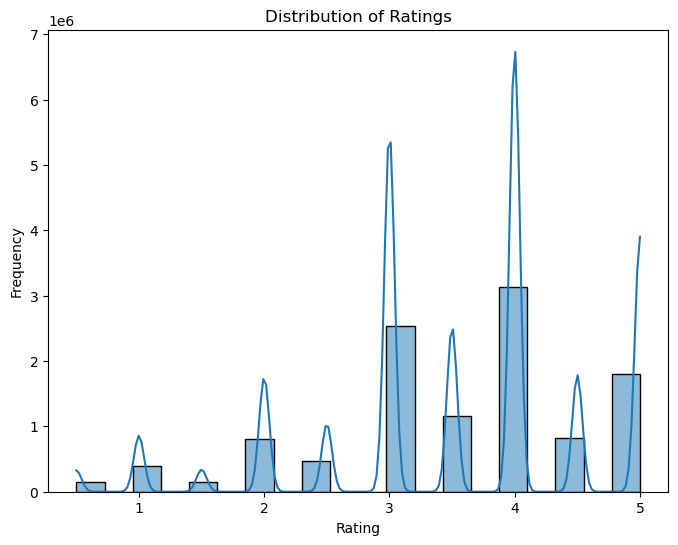

In [24]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

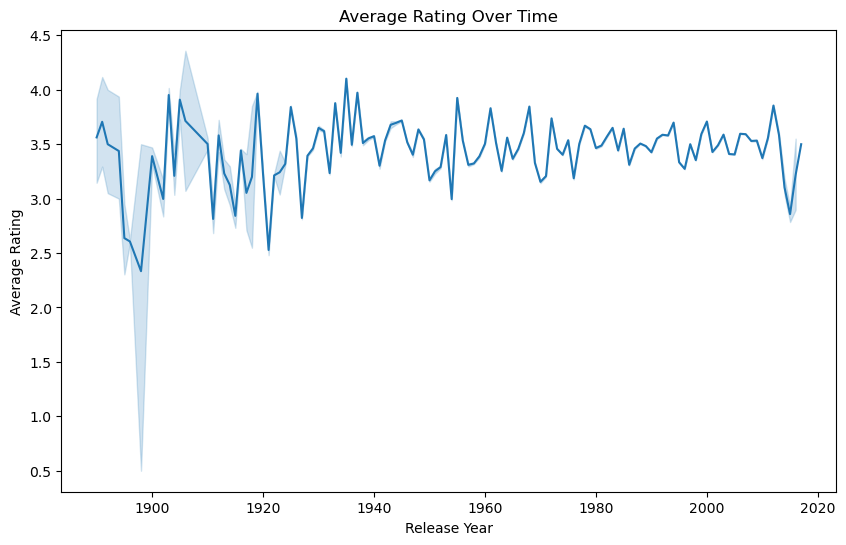

In [25]:
# Distribution of Ratings Over Time (Year)
merged_df['release_year'] = pd.to_datetime(merged_df['release_date']).dt.year
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='rating', data=merged_df)
plt.title('Average Rating Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()



In [26]:
# Convert release_date to datetime
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# Extract year from release_date
merged_df['release_year'] = merged_df['release_date'].dt.year

# Get value counts for a categorical column
print(merged_df['release_year'].value_counts())

# Get unique values for a categorical column
print(merged_df['release_year'].unique())

2006    650800
2007    642616
2003    562081
2004    544839
2000    499948
         ...  
1918        10
1894         8
1906         7
1898         3
2017         1
Name: release_year, Length: 121, dtype: int64
[1994 1959 1993 2006 1997 1937 2007 2000 1979 2012 1995 2005 2002 2001
 1935 1991 1984 2003 1946 1975 1928 1989 1992 1949 1990 1940 1996 1999
 2004 1969 1956 1965 1933 1955 1961 1957 1977 1968 2008 1945 1974 1964
 2010 1922 1931 1924 1962 1950 1998 1983 1920 1936 1966 1958 1976 1967
 1982 1988 1972 1932 1987 2009 1986 1900 2011 1978 1896 1942 1953 1919
 1938 1971 1981 1960 1954 1944 1985 1939 1973 1948 1916 1926 1925 1980
 1963 1930 1952 1929 1947 1970 1941 1927 2013 1943 1951 1923 1903 1910
 1921 1914 1915 1934 2015 1911 1902 1913 2014 1912 2017 1904 1892 1895
 1905 2016 1891 1917 1906 1890 1918 1898 1894]


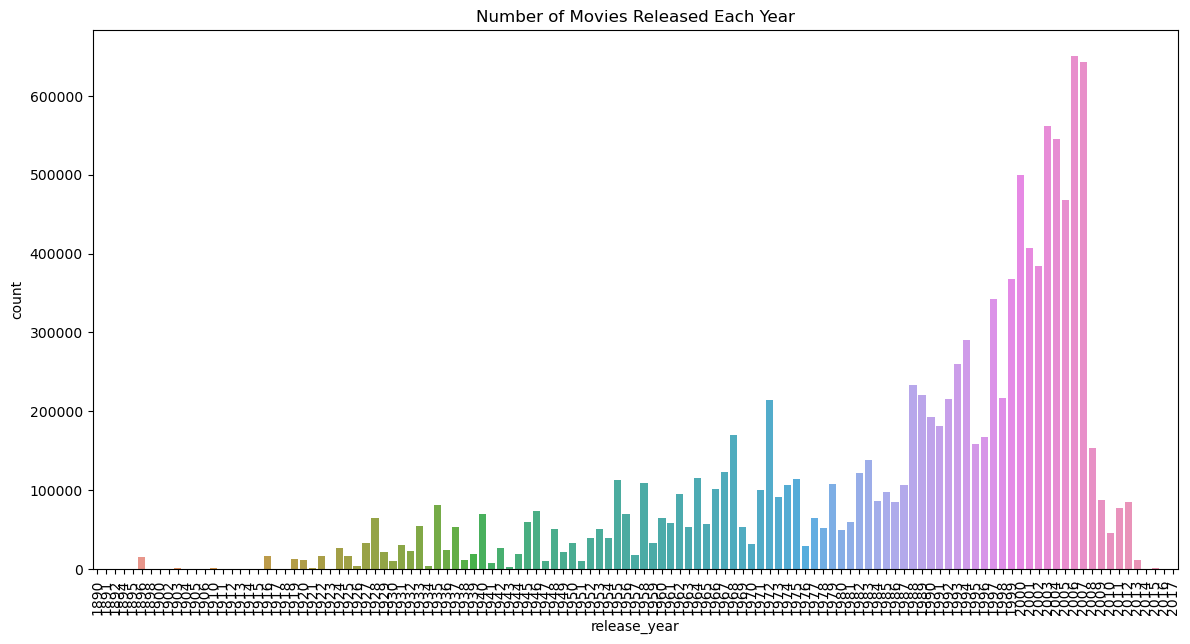

In [27]:
# Convert release_date to datetime
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# Extract year from release_date
merged_df['release_year'] = merged_df['release_date'].dt.year

# Plot the number of movies released each year
plt.figure(figsize=(14, 7))
sns.countplot(data=merged_df, x='release_year')
plt.xticks(rotation=90)
plt.title('Number of Movies Released Each Year')
plt.show()

# Genres Encoding

In [28]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Function to extract genre names
def extract_genre_names(genre_list):
    genres = []
    try:
        genres = [genre['name'] for genre in ast.literal_eval(genre_list)]
    except:
        pass
    return genres

# Extract genre names
merged_df['genres'] = merged_df['genres'].apply(extract_genre_names)

# One-hot encode the genre names
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(merged_df['genres'])

# Convert encoded genres to DataFrame
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Concatenate encoded genres with the original DataFrame
merged_df = pd.concat([merged_df, genres_df], axis=1)

# Drop the original 'genres' column
merged_df.drop('genres', axis=1, inplace=True)

# Print the resulting DataFrame to verify
print(merged_df.head())

   userId  movieId  rating     timestamp popularity release_date  \
0     1.0    110.0     1.0  1.425942e+09   7.832755   1994-05-27   
1     1.0    147.0     4.5  1.425942e+09   7.268688   1959-05-04   
2     1.0    858.0     5.0  1.425942e+09  10.234919   1993-06-24   
4     1.0   1246.0     5.0  1.425942e+09  11.697604   2006-12-20   
5     1.0   1968.0     4.0  1.425942e+09   6.285574   1997-02-14   

                  title  vote_average  vote_count  release_year  ...  History  \
0     Three Colors: Red           7.8       246.0        1994.0  ...      0.0   
1         The 400 Blows           8.0       363.0        1959.0  ...      0.0   
2  Sleepless in Seattle           6.5       630.0        1993.0  ...      0.0   
4          Rocky Balboa           6.5       858.0        2006.0  ...      0.0   
5         Fools Rush In           5.8       133.0        1997.0  ...      0.0   

   Horror  Music  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  \
0     0.0    0.0      1.

In [29]:
merged_df.head()

,userId,movieId,rating,timestamp,popularity,release_date,title,vote_average,vote_count,release_year,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,110.0,1.0,1.425942e+09,7.832755,1994-05-27,Three Colors: Red,7.8,246.0,1994.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,147.0,4.5,1.425942e+09,7.268688,1959-05-04,The 400 Blows,8.0,363.0,1959.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,858.0,5.0,1.425942e+09,10.234919,1993-06-24,Sleepless in Seattle,6.5,630.0,1993.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1246.0,5.0,1.425942e+09,11.697604,2006-12-20,Rocky Balboa,6.5,858.0,2006.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1968.0,4.0,1.425942e+09,6.285574,1997-02-14,Fools Rush In,5.8,133.0,1997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
merged_df.head()

,userId,movieId,rating,timestamp,popularity,release_date,title,vote_average,vote_count,release_year,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,110.0,1.0,1.425942e+09,7.832755,1994-05-27,Three Colors: Red,7.8,246.0,1994.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,147.0,4.5,1.425942e+09,7.268688,1959-05-04,The 400 Blows,8.0,363.0,1959.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,858.0,5.0,1.425942e+09,10.234919,1993-06-24,Sleepless in Seattle,6.5,630.0,1993.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1246.0,5.0,1.425942e+09,11.697604,2006-12-20,Rocky Balboa,6.5,858.0,2006.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1968.0,4.0,1.425942e+09,6.285574,1997-02-14,Fools Rush In,5.8,133.0,1997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
import pandas as pd

# Example assuming 'release_date' is already in Timestamp format
merged_df['release_year'] = merged_df['release_date'].apply(lambda x: x.year if pd.notnull(x) else 0)



# Data Slicing and Filtering

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17845405 entries, 0 to 11430461
Data columns (total 30 columns):
 #   Column           Dtype         
---  ------           -----         
 0   userId           float64       
 1   movieId          float64       
 2   rating           float64       
 3   timestamp        float64       
 4   popularity       object        
 5   release_date     datetime64[ns]
 6   title            object        
 7   vote_average     float64       
 8   vote_count       float64       
 9   release_year     int64         
 10  Action           float64       
 11  Adventure        float64       
 12  Animation        float64       
 13  Comedy           float64       
 14  Crime            float64       
 15  Documentary      float64       
 16  Drama            float64       
 17  Family           float64       
 18  Fantasy          float64       
 19  Foreign          float64       
 20  History          float64       
 21  Horror           float64     

In [33]:
# Filter movies released after the year 2000
filtered_df = merged_df[merged_df['release_year'] > 2000]

# Print the resulting DataFrame to verify
print(filtered_df.head())

    userId  movieId  rating     timestamp popularity release_date  \
4      1.0   1246.0     5.0  1.425942e+09  11.697604   2006-12-20   
8      1.0   2959.0     4.0  1.425942e+09   7.102076   2007-07-04   
14     1.0  58559.0     4.0  1.425942e+09    0.77848   2012-08-29   
23     1.0  96821.0     5.0  1.425941e+09   9.737921   2012-02-11   
28     2.0     25.0     3.0  8.670392e+08   9.997032   2005-11-04   

                                   title  vote_average  vote_count  \
4                           Rocky Balboa           6.5       858.0   
8                         License to Wed           5.3       258.0   
14  Confession of a Child of the Century           4.9         6.0   
23                       Caesar Must Die           6.6        29.0   
28                               Jarhead           6.6       776.0   

    release_year  ...  History  Horror  Music  Mystery  Romance  \
4           2006  ...      0.0     0.0    0.0      0.0      1.0   
8           2007  ...      0.0

In [34]:
# Remove movies with too few reviews
movie_counts = merged_df['movieId'].value_counts()
popular_movies = movie_counts[movie_counts > 10].index  # Threshold: more than 10 reviews
filtered_df = filtered_df[filtered_df['movieId'].isin(popular_movies)]

# Remove users with too few reviews
user_counts = merged_df['userId'].value_counts()
active_users = user_counts[user_counts > 10].index  # Threshold: more than 10 reviews
filtered_df = filtered_df[filtered_df['userId'].isin(active_users)]

# Print the resulting DataFrame to verify
print(filtered_df.head())

    userId  movieId  rating     timestamp popularity release_date  \
4      1.0   1246.0     5.0  1.425942e+09  11.697604   2006-12-20   
8      1.0   2959.0     4.0  1.425942e+09   7.102076   2007-07-04   
14     1.0  58559.0     4.0  1.425942e+09    0.77848   2012-08-29   
23     1.0  96821.0     5.0  1.425941e+09   9.737921   2012-02-11   
28     2.0     25.0     3.0  8.670392e+08   9.997032   2005-11-04   

                                   title  vote_average  vote_count  \
4                           Rocky Balboa           6.5       858.0   
8                         License to Wed           5.3       258.0   
14  Confession of a Child of the Century           4.9         6.0   
23                       Caesar Must Die           6.6        29.0   
28                               Jarhead           6.6       776.0   

    release_year  ...  History  Horror  Music  Mystery  Romance  \
4           2006  ...      0.0     0.0    0.0      0.0      1.0   
8           2007  ...      0.0

In [35]:
# Assuming the DataFrame has already been processed with one-hot encoding for genres
filtered_genres_ratings = filtered_df[['userId', 'movieId','rating','timestamp','title', 'release_year'] + list(mlb.classes_)]

# Print the resulting DataFrame to verify
print(filtered_genres_ratings.head())

    userId  movieId  rating     timestamp  \
4      1.0   1246.0     5.0  1.425942e+09   
8      1.0   2959.0     4.0  1.425942e+09   
14     1.0  58559.0     4.0  1.425942e+09   
23     1.0  96821.0     5.0  1.425941e+09   
28     2.0     25.0     3.0  8.670392e+08   

                                   title  release_year  Action  Adventure  \
4                           Rocky Balboa          2006     0.0        0.0   
8                         License to Wed          2007     1.0        0.0   
14  Confession of a Child of the Century          2012     0.0        0.0   
23                       Caesar Must Die          2012     0.0        1.0   
28                               Jarhead          2005     0.0        0.0   

    Animation  Comedy  ...  History  Horror  Music  Mystery  Romance  \
4         0.0     1.0  ...      0.0     0.0    0.0      0.0      1.0   
8         0.0     0.0  ...      0.0     0.0    0.0      0.0      0.0   
14        0.0     0.0  ...      0.0     0.0    0.0

In [36]:
filtered_genres_ratings.head()

,userId,movieId,rating,timestamp,title,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4,1.0,1246.0,5.0,1.425942e+09,Rocky Balboa,2006,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,2959.0,4.0,1.425942e+09,License to Wed,2007,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,58559.0,4.0,1.425942e+09,Confession of a Child of the Century,2012,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,1.0,96821.0,5.0,1.425941e+09,Caesar Must Die,2012,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,2.0,25.0,3.0,8.670392e+08,Jarhead,2005,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
filtered_genres_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923794 entries, 4 to 26025353
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   userId           float64
 1   movieId          float64
 2   rating           float64
 3   timestamp        float64
 4   title            object 
 5   release_year     int64  
 6   Action           float64
 7   Adventure        float64
 8   Animation        float64
 9   Comedy           float64
 10  Crime            float64
 11  Documentary      float64
 12  Drama            float64
 13  Family           float64
 14  Fantasy          float64
 15  Foreign          float64
 16  History          float64
 17  Horror           float64
 18  Music            float64
 19  Mystery          float64
 20  Romance          float64
 21  Science Fiction  float64
 22  TV Movie         float64
 23  Thriller         float64
 24  War              float64
 25  Western          float64
dtypes: float64(24), int64(1), object(1)
memor

In [38]:
#checking null values
filtered_genres_ratings.isnull().sum()

userId                   0
movieId                  0
rating                   0
timestamp                0
title                    0
release_year             0
Action             2201340
Adventure          2201340
Animation          2201340
Comedy             2201340
Crime              2201340
Documentary        2201340
Drama              2201340
Family             2201340
Fantasy            2201340
Foreign            2201340
History            2201340
Horror             2201340
Music              2201340
Mystery            2201340
Romance            2201340
Science Fiction    2201340
TV Movie           2201340
Thriller           2201340
War                2201340
Western            2201340
dtype: int64

In [39]:
filtered_genres_ratings.dropna(inplace=True)

/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_817/3545902056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres_ratings.dropna(inplace=True)


In [40]:
filtered_genres_ratings.isnull().sum()

userId             0
movieId            0
rating             0
timestamp          0
title              0
release_year       0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [41]:
filtered_genres_ratings.shape

(1722454, 26)

In [43]:
print(filtered_genres_ratings.head())
print(filtered_genres_ratings.columns)

    userId  movieId  rating     timestamp  \
4      1.0   1246.0     5.0  1.425942e+09   
8      1.0   2959.0     4.0  1.425942e+09   
14     1.0  58559.0     4.0  1.425942e+09   
23     1.0  96821.0     5.0  1.425941e+09   
28     2.0     25.0     3.0  8.670392e+08   

                                   title  release_year  Action  Adventure  \
4                           Rocky Balboa          2006     0.0        0.0   
8                         License to Wed          2007     1.0        0.0   
14  Confession of a Child of the Century          2012     0.0        0.0   
23                       Caesar Must Die          2012     0.0        1.0   
28                               Jarhead          2005     0.0        0.0   

    Animation  Comedy  ...  History  Horror  Music  Mystery  Romance  \
4         0.0     1.0  ...      0.0     0.0    0.0      0.0      1.0   
8         0.0     0.0  ...      0.0     0.0    0.0      0.0      0.0   
14        0.0     0.0  ...      0.0     0.0    0.0

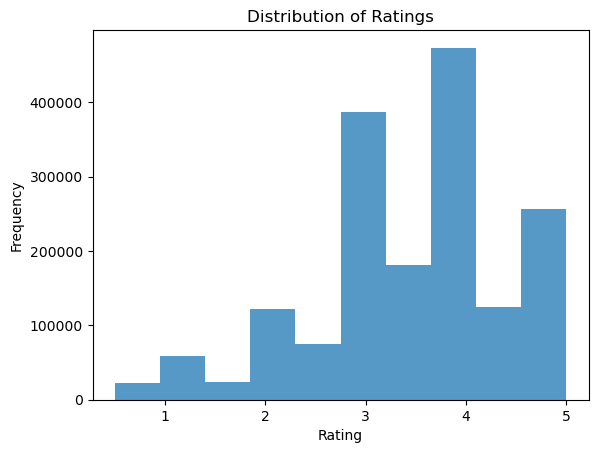

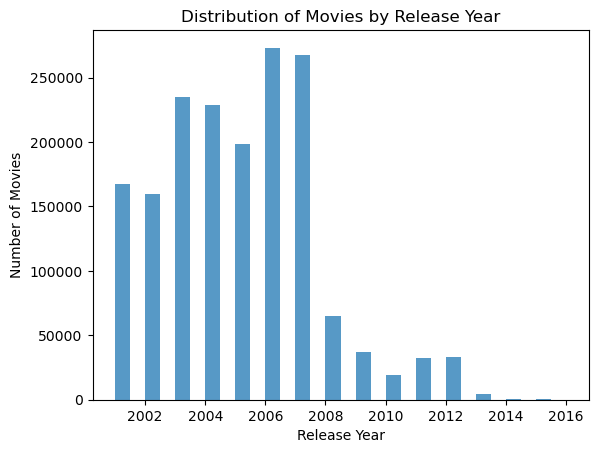

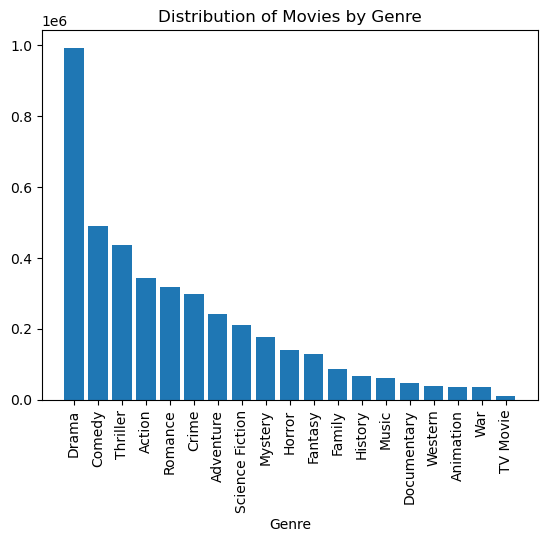

In [44]:
# Distribution of ratings

plt.hist(filtered_genres_ratings['rating'], bins=10, alpha=0.75)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Distribution of movies across release years
plt.hist(filtered_genres_ratings['release_year'], bins=30, alpha=0.75)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year')
plt.show()

# Distribution of genres (assuming genre columns exist)
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
                 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
                 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

genre_counts = filtered_genres_ratings[genre_columns].sum().sort_values(ascending=False)

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.title('Distribution of Movies by Genre')
plt.show()

Correlation between Rating and Release Year:
                rating  release_year
rating        1.000000      0.039467
release_year  0.039467      1.000000


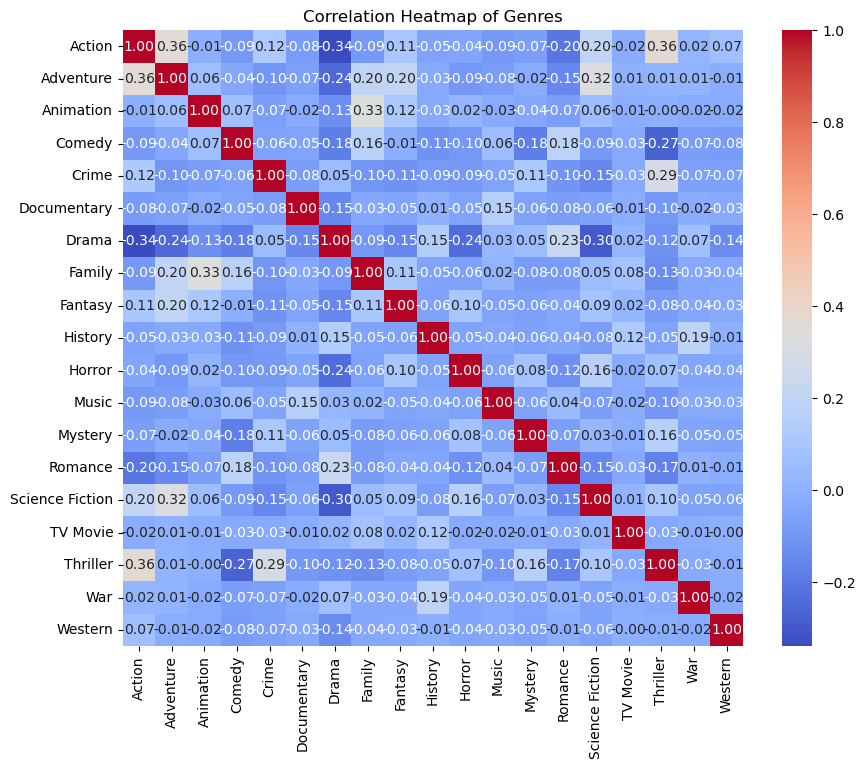

In [45]:
# Correlation between rating and release year
corr = filtered_genres_ratings[['rating', 'release_year']].corr()
print('Correlation between Rating and Release Year:')
print(corr)

# Correlation heatmap between genres
genre_corr = filtered_genres_ratings[genre_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(genre_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Genres')
plt.show()




# # Modeling and Analysis

# MF

In [46]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse


In [47]:
filtered_genres_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722454 entries, 4 to 11430456
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   userId           float64
 1   movieId          float64
 2   rating           float64
 3   timestamp        float64
 4   title            object 
 5   release_year     int64  
 6   Action           float64
 7   Adventure        float64
 8   Animation        float64
 9   Comedy           float64
 10  Crime            float64
 11  Documentary      float64
 12  Drama            float64
 13  Family           float64
 14  Fantasy          float64
 15  Foreign          float64
 16  History          float64
 17  Horror           float64
 18  Music            float64
 19  Mystery          float64
 20  Romance          float64
 21  Science Fiction  float64
 22  TV Movie         float64
 23  Thriller         float64
 24  War              float64
 25  Western          float64
dtypes: float64(24), int64(1), object(1)
memor

In [48]:
#checking null values
filtered_genres_ratings.isnull().sum()

userId             0
movieId            0
rating             0
timestamp          0
title              0
release_year       0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [49]:
filtered_genres_ratings.dropna(inplace=True)

/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_817/3545902056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres_ratings.dropna(inplace=True)


In [50]:
filtered_genres_ratings.isnull().sum()

userId             0
movieId            0
rating             0
timestamp          0
title              0
release_year       0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [52]:
filtered_genres_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722454 entries, 4 to 11430456
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   userId           float64
 1   movieId          float64
 2   rating           float64
 3   timestamp        float64
 4   title            object 
 5   release_year     int64  
 6   Action           float64
 7   Adventure        float64
 8   Animation        float64
 9   Comedy           float64
 10  Crime            float64
 11  Documentary      float64
 12  Drama            float64
 13  Family           float64
 14  Fantasy          float64
 15  Foreign          float64
 16  History          float64
 17  Horror           float64
 18  Music            float64
 19  Mystery          float64
 20  Romance          float64
 21  Science Fiction  float64
 22  TV Movie         float64
 23  Thriller         float64
 24  War              float64
 25  Western          float64
dtypes: float64(24), int64(1), object(1)
memor

In [53]:
filtered_genres_ratings.head()

,userId,movieId,rating,timestamp,title,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4,1.0,1246.0,5.0,1.425942e+09,Rocky Balboa,2006,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,2959.0,4.0,1.425942e+09,License to Wed,2007,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,58559.0,4.0,1.425942e+09,Confession of a Child of the Century,2012,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,1.0,96821.0,5.0,1.425941e+09,Caesar Must Die,2012,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,2.0,25.0,3.0,8.670392e+08,Jarhead,2005,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Ensure userId, movieId, and rating columns are of correct types
filtered_genres_ratings['userId'] = filtered_genres_ratings['userId'].astype(int)
filtered_genres_ratings['movieId'] = filtered_genres_ratings['movieId'].astype(int)
filtered_genres_ratings['rating'] = filtered_genres_ratings['rating'].astype(float)

/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_817/628895273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres_ratings['userId'] = filtered_genres_ratings['userId'].astype(int)
/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_817/628895273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres_ratings['movieId'] = filtered_genres_ratings['movieId'].astype(int)
/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_817/628895273.py:4: SettingWithCopyWa

In [ ]:
from surprise import Dataset, Reader, SVD, BaselineOnly
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

In [55]:

filtered_genres_ratings = filtered_genres_ratings[filtered_genres_ratings['Drama'] == 1]

# Define the rating scale
reader = Reader(rating_scale=(filtered_genres_ratings['rating'].min(), filtered_genres_ratings['rating'].max()))

# Load the data into Surprise format
data = Dataset.load_from_df(filtered_genres_ratings[['userId', 'movieId', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize the SVD model and train it
svd_model = SVD()
svd_model.fit(trainset)

# Test the SVD model
svd_predictions = svd_model.test(testset)

# Compute RMSE for the SVD model
svd_rmse = rmse(svd_predictions)
print(f"SVD Model RMSE: {svd_rmse}")

# Initialize the baseline model and train it
baseline_model = BaselineOnly()
baseline_model.fit(trainset)

# Test the baseline model
baseline_predictions = baseline_model.test(testset)

# Compute RMSE for the baseline model
baseline_rmse = rmse(baseline_predictions)
print(f"Baseline Model RMSE: {baseline_rmse}")

# Compare RMSE
if svd_rmse < baseline_rmse:
    print("The SVD model performs better than the baseline model.")
else:
    print("The baseline model performs better than the SVD model.")


RMSE: 0.8935
SVD Model RMSE: 0.8934736148896896
Estimating biases using als...
RMSE: 0.8927
Baseline Model RMSE: 0.8927343728379543
The baseline model performs better than the SVD model.


In [56]:

reader = Reader(rating_scale=(filtered_genres_ratings['rating'].min(), filtered_genres_ratings['rating'].max())) 

# Create Surprise Dataset object 
data = Dataset.load_from_df(filtered_genres_ratings[['userId', 'movieId', 'rating']], reader=reader) 

# Split data for training and testing 
trainset, testset = train_test_split(data, test_size=0.2) 

# ---- Baseline Model ---- 
baseline_model = BaselineOnly() 
baseline_model.fit(trainset) 
baseline_predictions = baseline_model.test(testset) 
baseline_rmse = rmse(baseline_predictions) 
print(f"Baseline Model RMSE: {baseline_rmse}") 

# ---- SVD Model ---- 
svd_model = SVD() 
svd_model.fit(trainset) 
svd_predictions = svd_model.test(testset) 
svd_rmse = rmse(svd_predictions) 
print(f"SVD Model RMSE: {svd_rmse}") 

# ---- NMF Model (Alternative Matrix Factorization) ---- 
nmf_model = NMF() 
nmf_model.fit(trainset) 
nmf_predictions = nmf_model.test(testset) 
nmf_rmse = rmse(nmf_predictions) 
print(f"NMF Model RMSE: {nmf_rmse}")

Estimating biases using als...
RMSE: 0.8943
Baseline Model RMSE: 0.8942985384804074
RMSE: 0.8957
SVD Model RMSE: 0.8956751043557843
RMSE: 0.9558
NMF Model RMSE: 0.9558434782521406


In [65]:
#filtered_genres_ratings is DataFrame with columns: userId, movieId, rating

# Create a reader
reader = Reader(rating_scale=(filtered_genres_ratings['rating'].min(), filtered_genres_ratings['rating'].max()))

# Load the DataFrame into a surprise Dataset
data = Dataset.load_from_df(filtered_genres_ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Define parameter grid for SVD
param_grid = {
    'n_factors': [50, 100],
    'n_epochs': [20, 30],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Best model
best_svd = gs.best_estimator['rmse']

# Train the best model on the entire training set
best_svd.fit(trainset)

# Evaluate on the test set
predictions_svd = best_svd.test(testset)
rmse_svd = accuracy.rmse(predictions_svd, verbose=True)
mae_svd = accuracy.mae(predictions_svd, verbose=True)

print(f'Best SVD Model RMSE: {rmse_svd}')
print(f'SVD Model MAE: {mae_svd}')

# Perform cross-validation on the best SVD model
cv_results = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the Baseline model
baseline = BaselineOnly()
baseline.fit(trainset)

# Predict with the Baseline model
predictions_baseline = baseline.test(testset)

# Combine predictions (simple averaging) and keep original true ratings
def blend(preds1, preds2):
    blended_preds = []
    for p1, p2 in zip(preds1, preds2):
        blended_est = (p1.est + p2.est) / 2
        blended_preds.append(Prediction(p1.uid, p1.iid, p1.r_ui, blended_est, None))
    return blended_preds

# Perform blending
blended_predictions = blend(predictions_svd, predictions_baseline)

# Calculate RMSE for blended predictions
blended_rmse = accuracy.rmse(blended_predictions, verbose=True)

print(f'Blended Model RMSE: {blended_rmse}')


RMSE: 0.8904
MAE:  0.6871
Best SVD Model RMSE: 0.8903780747336361
SVD Model MAE: 0.6870985059400945
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8908  0.8926  0.8897  0.8920  0.8893  0.8909  0.0013  
MAE (testset)     0.6869  0.6870  0.6869  0.6881  0.6859  0.6870  0.0007  
Fit time          6.20    6.13    6.21    6.21    6.11    6.17    0.04    
Test time         1.18    0.48    0.48    1.07    0.49    0.74    0.32    
Estimating biases using als...
RMSE: 0.8888
Blended Model RMSE: 0.8887639260523031


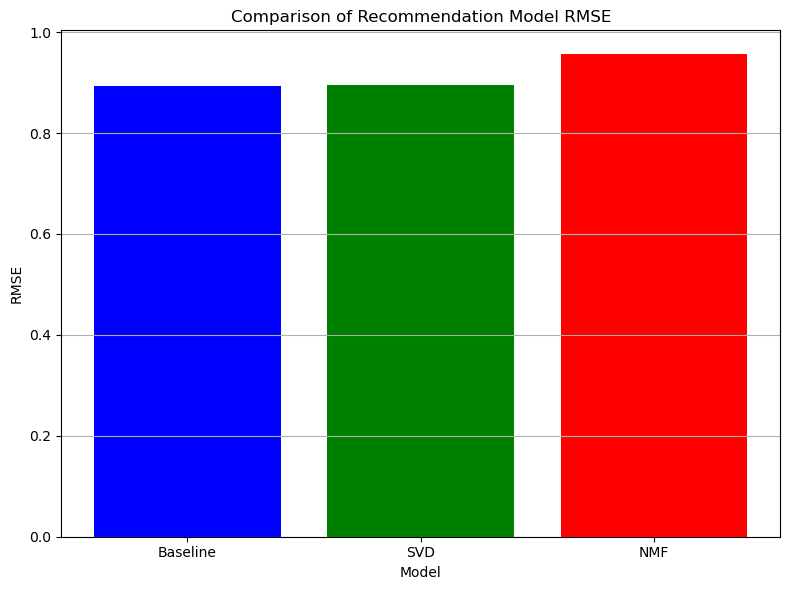

In [81]:
import matplotlib.pyplot as plt

# Model names and their corresponding RMSE values
models = ["Baseline", "SVD", "NMF"]
rmse_values = [0.89429, 0.89567, 0.95584]

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Comparison of Recommendation Model RMSE")
plt.grid(axis='y')  # Add gridlines on the Y-axis
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()


# Display the chart
plt.show()



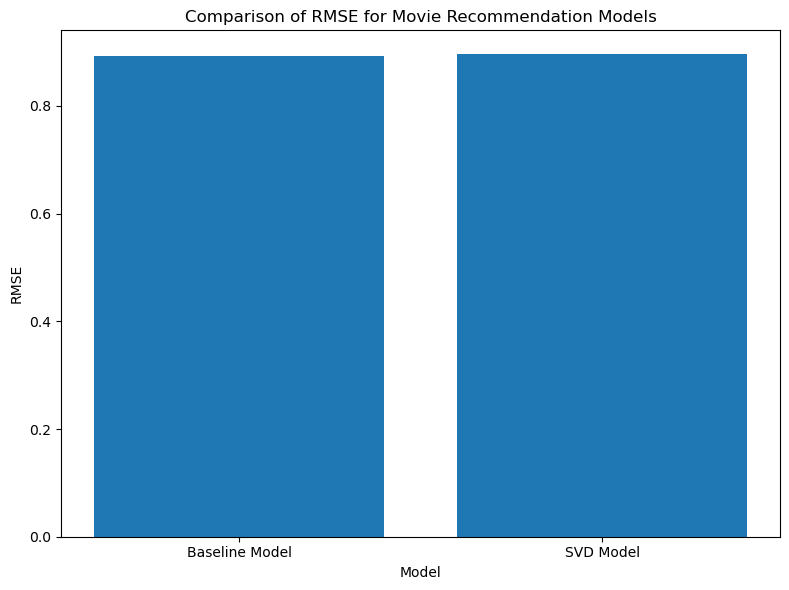

In [72]:
import matplotlib.pyplot as plt

# Sample RMSE values
rmse_values = {
    'Baseline Model': 0.8927343728379543,
    'SVD Model': 0.8956751043557843
}

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(rmse_values.keys(), rmse_values.values())
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Movie Recommendation Models')
plt.xticks(rotation=0)  
plt.tight_layout()

# Display or save the chart
# plt.show()  # To display the chart
plt.savefig('rmse_comparison.png') 

In [64]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
import pandas as pd

# Assuming filtered_genres_ratings is your DataFrame with columns: user, item, rating
# Adjust the column names if they are different in your DataFrame

# Create a reader
reader = Reader(rating_scale=(filtered_genres_ratings['rating'].min(), filtered_genres_ratings['rating'].max()))

# Load the DataFrame into a surprise Dataset
data = Dataset.load_from_df(filtered_genres_ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Define parameter grid for SVD
param_grid = {
    'n_factors': [50, 100],
    'n_epochs': [20, 30],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Best model
best_svd = gs.best_estimator['rmse']

# Train the best model on the entire training set
best_svd.fit(trainset)

# Evaluate on the test set
predictions = best_svd.test(testset)
rmse_svd = accuracy.rmse(predictions, verbose=True)

print(f'Best SVD Model RMSE: {rmse_svd}')

# Calculate MAE
mae = accuracy.mae(predictions, verbose=True)
print(f'SVD Model MAE: {mae}')

# Perform cross-validation on the best SVD model
cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the Baseline model
baseline = BaselineOnly()
baseline.fit(trainset)

# Predict with the Baseline model
predictions_baseline = baseline.test(testset)

# Combine predictions (simple averaging)
def blend(preds1, preds2):
    blended_preds = []
    for p1, p2 in zip(preds1, preds2):
        blended_preds.append(p1.est * 0.5 + p2.est * 0.5)
    return blended_preds

blended_predictions = blend(predictions_baseline, predictions)

# Calculate RMSE for blended predictions
blended_rmse = accuracy.rmse(blended_predictions, verbose=True)

print(f'Blended Model RMSE: {blended_rmse}')


# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Define parameter grid for SVD
param_grid = {
    'n_factors': [50, 100],
    'n_epochs': [20, 30],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Best model
best_svd = gs.best_estimator['rmse']

# Train the best model on the entire training set
best_svd.fit(trainset)

# Evaluate on the test set
predictions = best_svd.test(testset)
rmse_svd = accuracy.rmse(predictions, verbose=True)

print(f'Best SVD Model RMSE: {rmse_svd}')



RMSE: 0.8939
Best SVD Model RMSE: 0.8939369959617985
MAE:  0.6898
SVD Model MAE: 0.6897752990611041
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8888  0.8915  0.8906  0.8908  0.8904  0.8904  0.0009  
MAE (testset)     0.6850  0.6864  0.6868  0.6869  0.6872  0.6864  0.0008  
Fit time          6.38    6.19    6.64    6.20    6.46    6.38    0.17    
Test time         0.47    0.48    0.87    0.88    0.89    0.72    0.20    
Estimating biases using als...


TypeError: cannot unpack non-iterable numpy.float64 object

In [73]:
# Calculate MAE
mae = accuracy.mae(predictions, verbose=True)
print(f'SVD Model MAE: {mae}')


MAE:  0.6898
SVD Model MAE: 0.6897752990611041


In [74]:
# Perform cross-validation on the best SVD model
cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8927  0.8873  0.8937  0.8900  0.8908  0.8909  0.0022  
MAE (testset)     0.6889  0.6843  0.6895  0.6865  0.6873  0.6873  0.0019  
Fit time          5.77    6.33    5.87    6.41    5.94    6.06    0.26    
Test time         1.71    0.47    1.96    0.55    0.49    1.04    0.66    


{'test_rmse': array([0.89271199, 0.88728788, 0.89366296, 0.8900025 , 0.8907522 ]),
 'test_mae': array([0.68888514, 0.68426855, 0.68954509, 0.68648935, 0.68734769]),
 'fit_time': (5.7686238288879395,
  6.333575963973999,
  5.874994993209839,
  6.410704851150513,
  5.936474084854126),
 'test_time': (1.7124898433685303,
  0.47286295890808105,
  1.961303949356079,
  0.5527071952819824,
  0.4878273010253906)}

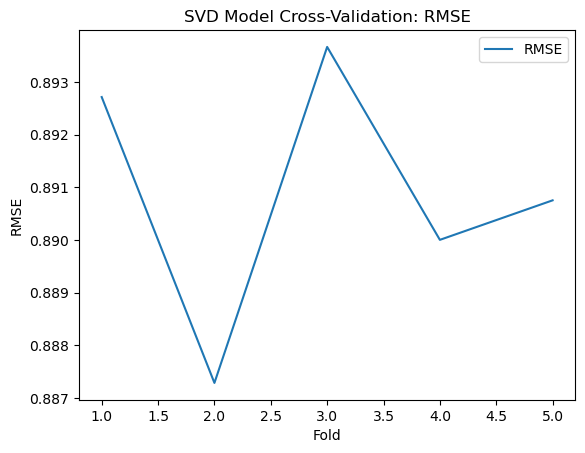

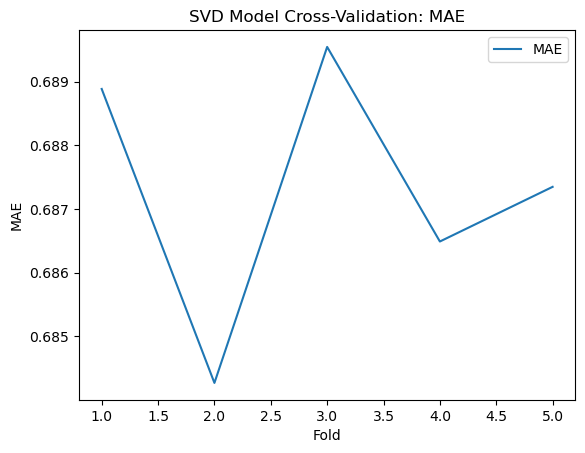

In [85]:
# RMSE Plot
sns.lineplot(x=range(1, 6), y="test_rmse", data=df, label="RMSE")  # Adjust range(1, 6) for number of folds
plt.title("SVD Model Cross-Validation: RMSE")  # Use plt.title instead of sns.title
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.show()  # Display the plot

# MAE Plot (similar to RMSE plot, replace "test_rmse" with "test_mae")
sns.lineplot(x=range(1, 6), y="test_mae", data=df, label="MAE")
plt.title("SVD Model Cross-Validation: MAE")
plt.xlabel("Fold")
plt.ylabel("MAE")
plt.show()  # Display the plot


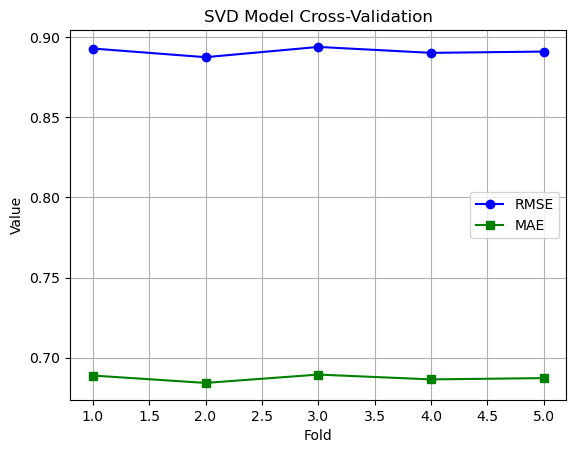

In [86]:
# Data from the table
folds = [1, 2, 3, 4, 5]
rmse_values = [0.8927, 0.8873, 0.8937, 0.8900, 0.8908]
mae_values = [0.6889, 0.6843, 0.6895, 0.6865, 0.6873]

# Combined Plot
plt.plot(folds, rmse_values, marker='o', label='RMSE', color='b')  # Blue for RMSE
plt.plot(folds, mae_values, marker='s', label='MAE', color='g')  # Green for MAE
plt.xlabel('Fold')
plt.ylabel('Value')
plt.title('SVD Model Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
from surprise import SVD, Dataset, Reader, accuracy, BaselineOnly
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
import pandas as pd

# Create a reader
reader = Reader(rating_scale=(filtered_genres_ratings['rating'].min(), filtered_genres_ratings['rating'].max()))

# Load the DataFrame into a surprise Dataset
data = Dataset.load_from_df(filtered_genres_ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Define parameter grid for SVD
param_grid = {
    'n_factors': [50, 100],
    'n_epochs': [20, 30],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Best model
best_svd = gs.best_estimator['rmse']

# Train the best model on the entire training set
best_svd.fit(trainset)

# Evaluate on the test set
predictions = best_svd.test(testset)
rmse_svd = accuracy.rmse(predictions, verbose=True)

print(f'Best SVD Model RMSE: {rmse_svd}')

# Calculate MAE
mae = accuracy.mae(predictions, verbose=True)
print(f'SVD Model MAE: {mae}')

# Perform cross-validation on the best SVD model
cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the Baseline model
baseline = BaselineOnly()
baseline.fit(trainset)

# Predict with the Baseline model
predictions_baseline = baseline.test(testset)

# Combine predictions (simple averaging)
def blend(preds1, preds2):
    blended_preds = []
    for p1, p2 in zip(preds1, preds2):
        blended_preds.append(p1.est * 0.5 + p2.est * 0.5)
    return blended_preds

blended_predictions = blend(predictions_baseline, predictions)

# Calculate RMSE for blended predictions
blended_rmse = accuracy.rmse(blended_predictions, verbose=True)

print(f'Blended Model RMSE: {blended_rmse}')


RMSE: 0.8916
Best SVD Model RMSE: 0.8915998843598865
MAE:  0.6874
SVD Model MAE: 0.6873610932661736
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8874  0.8926  0.8912  0.8898  0.8920  0.8906  0.0018  
MAE (testset)     0.6851  0.6878  0.6866  0.6858  0.6875  0.6866  0.0010  
Fit time          6.24    6.81    6.24    6.97    6.53    6.56    0.30    
Test time         0.48    2.57    0.48    0.53    2.61    1.33    1.03    
Estimating biases using als...


TypeError: cannot unpack non-iterable numpy.float64 object

# Using Hours

In [87]:
filtered_genres_ratings['hour'] = pd.to_datetime(filtered_genres_ratings['timestamp']).dt.hour

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
filtered_genres_ratings['hour_scaled'] = scaler.fit_transform(filtered_genres_ratings[['hour']])

# Now use the 'hour_scaled' feature in the model
# Load the DataFrame into a surprise Dataset with the new contextual feature
data = Dataset.load_from_df(filtered_genres_ratings[['userId', 'movieId', 'rating']], reader)


In [88]:
from surprise import AlgoBase
from surprise import PredictionImpossible
import numpy as np

class SVDWithContext(AlgoBase):
    def __init__(self, base_algo, context_data):
        super().__init__()
        self.base_algo = base_algo
        self.context_data = context_data

    def fit(self, trainset):
        self.trainset = trainset
        self.base_algo.fit(trainset)
        return self

    def estimate(self, u, i):
        # First, check if we can make a prediction
        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible('User or item is unknown.')
        
        # Get the base prediction from the SVD algorithm
        base_pred = self.base_algo.estimate(u, i)
        
        # Adjust the prediction based on the contextual feature
        # In this example, we simply add a bias based on the hour of the rating
        user_id = self.trainset.to_raw_uid(u)
        item_id = self.trainset.to_raw_iid(i)
        context_feature = self.context_data[(self.context_data['userId'] == user_id) & 
                                            (self.context_data['movieId'] == item_id)]['hour_scaled']
        if not context_feature.empty:
            context_bias = context_feature.values[0]
            adjusted_pred = base_pred + context_bias
        else:
            adjusted_pred = base_pred
        
        return adjusted_pred


In [89]:
from surprise import SVD, Dataset, Reader, accuracy, BaselineOnly
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
import pandas as pd


# Create a reader
reader = Reader(rating_scale=(filtered_genres_ratings['rating'].min(), filtered_genres_ratings['rating'].max()))

# Load the DataFrame into a surprise Dataset
data = Dataset.load_from_df(filtered_genres_ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Create the SVD algorithm
base_svd = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02)

# Create the custom context-aware algorithm
context_algo = SVDWithContext(base_svd, filtered_genres_ratings)

# Train the custom algorithm
context_algo.fit(trainset)

# Evaluate on the test set
predictions = context_algo.test(testset)
rmse_context_algo = accuracy.rmse(predictions, verbose=True)
print(f'Context-Aware SVD Model RMSE: {rmse_context_algo}')


RMSE: 0.8942
Context-Aware SVD Model RMSE: 0.8941911793724419


In [90]:
# Define parameter grid for the base SVD algorithm
param_grid = {
    'n_factors': [50, 100],
    'n_epochs': [20, 30],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Get the best SVD model
best_svd = gs.best_estimator['rmse']

# Create the custom context-aware algorithm with the best SVD model
context_algo = SVDWithContext(best_svd, filtered_genres_ratings)

# Train the custom algorithm
context_algo.fit(trainset)

# Evaluate on the test set
predictions = context_algo.test(testset)
rmse_context_algo = accuracy.rmse(predictions, verbose=True)
print(f'Context-Aware SVD Model RMSE: {rmse_context_algo}')


RMSE: 0.8914
Context-Aware SVD Model RMSE: 0.8913828925576213


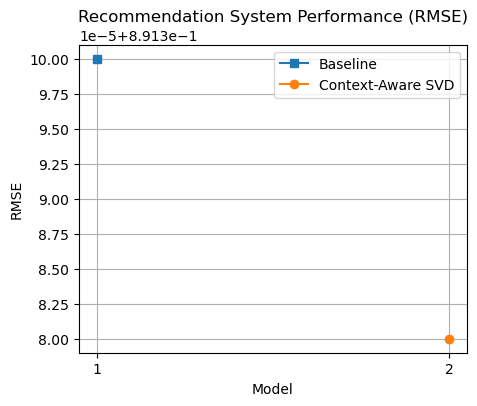

In [93]:
import matplotlib.pyplot as plt

# Extracting the RMSE values
baseline_rmse = 0.8914  # Baseline RMSE
context_algo_rmse = 0.89138  # Context-Aware SVD RMSE (slightly lower)

# Plotting the results
plt.figure(figsize=(5, 4))  # Adjust figure size as desired

# Set plot elements and labels
models = ['Baseline', 'Context-Aware SVD']
markers = ['s', 'o']  # List of marker styles

# Plot each line with its corresponding marker
plt.plot([1], [baseline_rmse], marker=markers[0], label=models[0])  # Baseline
plt.plot([2], [context_algo_rmse], marker=markers[1], label=models[1])  # Context-Aware

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Recommendation System Performance (RMSE)')
plt.xticks([1, 2])  # Set x-axis ticks for models
plt.legend()
plt.grid(True)
plt.show()


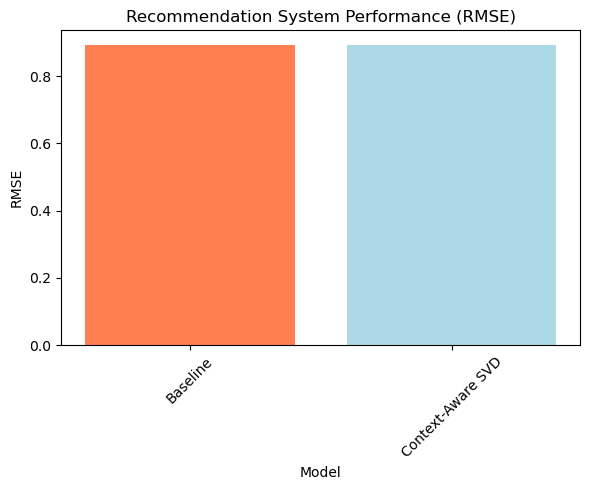

In [94]:
import matplotlib.pyplot as plt

# Extracting the RMSE values
baseline_rmse = 0.8914  # Baseline RMSE
context_algo_rmse = 0.89138  # Context-Aware SVD RMSE (slightly lower)

# Models and corresponding RMSE values
models = ['Baseline', 'Context-Aware SVD']
rmse_values = [baseline_rmse, context_algo_rmse]

# Create the bar chart
plt.figure(figsize=(6, 5))  # Adjust figure size as desired
plt.bar(models, rmse_values, color=['coral', 'lightblue'])  # Set bar colors

# Set plot elements and labels
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Recommendation System Performance (RMSE)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()
